I certify that the code and data in this assignment were generated independently,using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work. 

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,MaxPool2D,Conv2D
from keras.datasets import fashion_mnist
from keras import layers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
import numpy as np
from keras.layers import BatchNormalization
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
import numpy as np
labels = np.unique(y_train)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_labels = ['T-shirt/Top',
                'Trouser',
                'Pullover',
                'Dress',
                'Coat',
                'Sandal',
                'Shirt',
                'Sneaker',
                'Bag',
                'Ankle boot']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


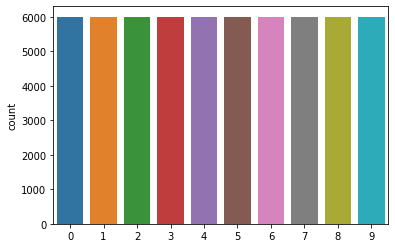

In [11]:
#Plot of Count of Train Data
plot = sns.countplot(y_train)

Text(0.5, 1.0, 'Label division in training data')

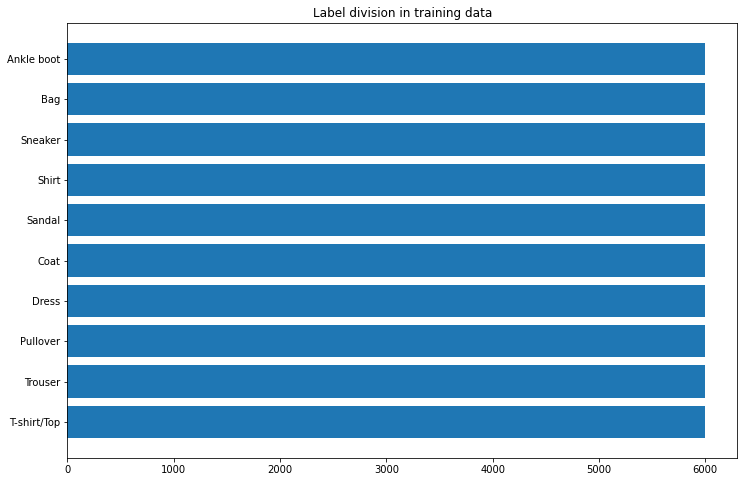

In [14]:
plt.figure(figsize=(12, 8))

label, label_count = np.unique(y_train, return_counts=True)
plt.barh(class_labels, label_count)
plt.title('Label division in training data')

Text(0.5, 1.0, 'Label division in test data')

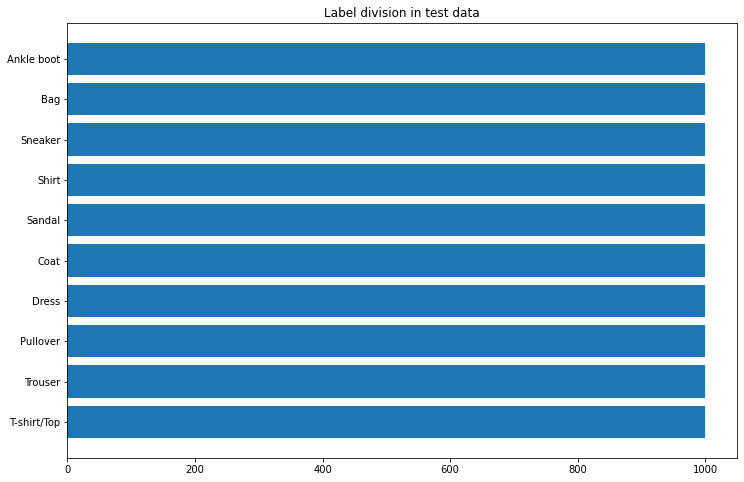

In [15]:
plt.figure(figsize=(12, 8))

label, label_count = np.unique(y_test, return_counts=True)
plt.barh(class_labels, label_count)
plt.title('Label division in test data')

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [12]:
y_train = keras.utils.np_utils.to_categorical(y_train,10)
y_test = keras.utils.np_utils.to_categorical(y_test,10)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


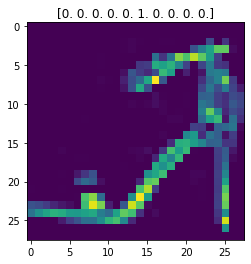

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X_train[8])
plt.title(y_train[8])  #5 is sandal
plt.show()

In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3),padding="same",activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), padding="same",activation="relu"))
model.add(Conv2D(64,(3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) # connecting conv2d to dense 

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation="softmax"))

# Compile the model 
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                        

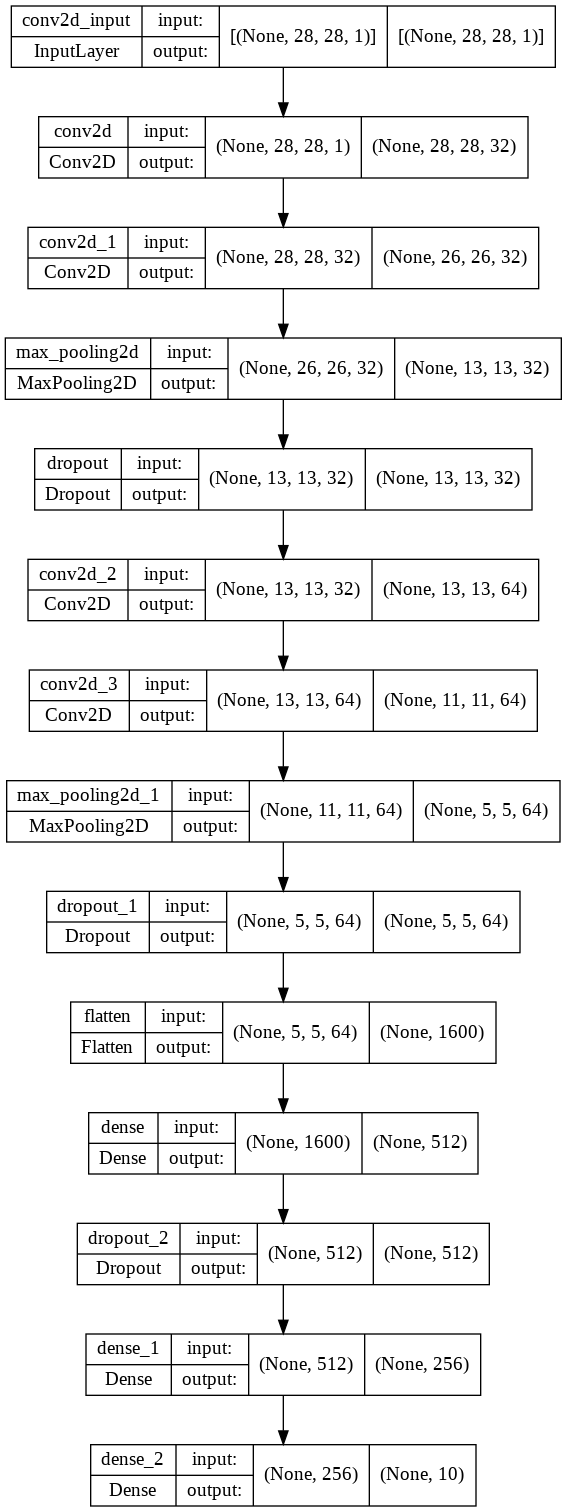

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
train = model.fit(X_train,y_train,batch_size=500,epochs=15,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/15
120/120 [==============================] - 19s 59ms/step - loss: 0.7661 - accuracy: 0.7105 - val_loss: 0.4726 - val_accuracy: 0.8228
Epoch 2/15
120/120 [==============================] - 7s 59ms/step - loss: 0.4461 - accuracy: 0.8344 - val_loss: 0.3661 - val_accuracy: 0.8647
Epoch 3/15
120/120 [==============================] - 7s 57ms/step - loss: 0.3688 - accuracy: 0.8640 - val_loss: 0.3252 - val_accuracy: 0.8809
Epoch 4/15
120/120 [==============================] - 7s 57ms/step - loss: 0.3275 - accuracy: 0.8793 - val_loss: 0.3036 - val_accuracy: 0.8879
Epoch 5/15
120/120 [==============================] - 7s 57ms/step - loss: 0.2991 - accuracy: 0.8890 - val_loss: 0.2712 - val_accuracy: 0.8970
Epoch 6/15
120/120 [==============================] - 7s 59ms/step - loss: 0.2755 - accuracy: 0.8987 - val_loss: 0.2704 - val_accuracy: 0.9000
Epoch 7/15
120/120 [==============================] - 7s 57ms/step - loss: 0.2615 - accuracy: 0.9042 - val_loss: 0.2473 - val_accuracy: 0.908

In [19]:
train_loss,train_accuracy = model.evaluate(X_train,y_train)
print('The accuracy of the model :', train_accuracy)
print('The Loss is :',train_loss)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.1333 - accuracy: 0.9502
The accuracy of the model : 0.9502000212669373
The Loss is : 0.13334181904792786


In [20]:
val_loss,val_accuracy = model.evaluate(X_test,y_test)
print('The accuracy of the model :', val_accuracy)
print('The Loss is :',val_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.2090 - accuracy: 0.9249
The accuracy of the model : 0.9248999953269958
The Loss is : 0.20895814895629883


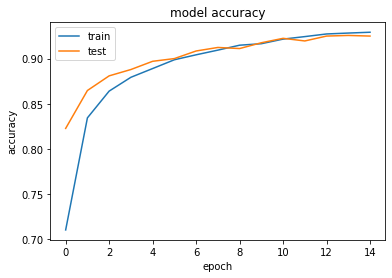

In [21]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

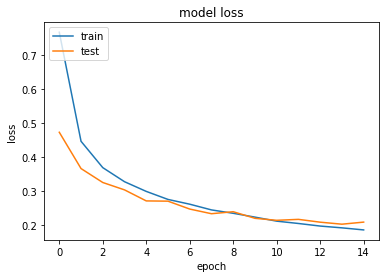

In [22]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Data Augmentation


In [23]:
m1 = Sequential([layers.RandomRotation(0.2),
                 layers.RandomFlip('horizontal'),
                 layers.RandomZoom(.5,.2),
                 layers.Conv2D(32, (3,3),padding="same",activation="relu", input_shape=(28,28,1)),
                 layers.Conv2D(32, (3,3), activation="relu"),
                 layers.MaxPool2D(pool_size=(2,2)),
                 layers.Dropout(0.25),
                 layers.Flatten(),
                 layers.Dense(512,activation="relu"),
                 layers.Dropout(0.5),
                 layers.Dense(256,activation="relu"),
                 layers.Dense(10,activation='softmax')])

m1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
m1.build(input_shape=(None,28,28,1))
m1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRota  (None, 28, 28, 1)        0         
 tion)                                                           
                                                                 
 random_flip (RandomFlip)    (None, 28, 28, 1)         0         
                                                                 
 random_zoom (RandomZoom)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                  

In [24]:
t1 = m1.fit(X_train,y_train,batch_size=500,epochs=30,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/30
120/120 [==============================] - 7s 43ms/step - loss: 1.2035 - accuracy: 0.5566 - val_loss: 0.7501 - val_accuracy: 0.7170
Epoch 2/30
120/120 [==============================] - 5s 41ms/step - loss: 0.8289 - accuracy: 0.6897 - val_loss: 0.7262 - val_accuracy: 0.7162
Epoch 3/30
120/120 [==============================] - 5s 41ms/step - loss: 0.7430 - accuracy: 0.7208 - val_loss: 0.6324 - val_accuracy: 0.7554
Epoch 4/30
120/120 [==============================] - 5s 42ms/step - loss: 0.6892 - accuracy: 0.7435 - val_loss: 0.5597 - val_accuracy: 0.7929
Epoch 5/30
120/120 [==============================] - 5s 41ms/step - loss: 0.6560 - accuracy: 0.7545 - val_loss: 0.5370 - val_accuracy: 0.7977
Epoch 6/30
120/120 [==============================] - 5s 41ms/step - loss: 0.6230 - accuracy: 0.7705 - val_loss: 0.5167 - val_accuracy: 0.8125
Epoch 7/30
120/120 [==============================] - 5s 41ms/step - loss: 0.5939 - accuracy: 0.7813 - val_loss: 0.5033 - val_accuracy: 0.8132

In [25]:
train_loss_aug,train_accuracy_aug = m1.evaluate(X_train,y_train)
print('The accuracy of the model :', train_accuracy_aug)
print('The Loss is :',train_loss_aug)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.3268 - accuracy: 0.8758
The accuracy of the model : 0.8757500052452087
The Loss is : 0.3268461525440216


In [26]:
val_loss_aug,val_accuracy_aug = m1.evaluate(X_test,y_test)
print('The accuracy of the model :', val_accuracy_aug)
print('The Loss is :',val_loss_aug)

313/313 [==============================] - 2s 5ms/step - loss: 0.3535 - accuracy: 0.8729
The accuracy of the model : 0.8729000091552734
The Loss is : 0.3535269498825073


Changing parameter {Dropout}

Epoch 1/30
120/120 [==============================] - 8s 60ms/step - loss: 0.7481 - accuracy: 0.7207 - val_loss: 0.4270 - val_accuracy: 0.8469
Epoch 2/30
120/120 [==============================] - 7s 57ms/step - loss: 0.4139 - accuracy: 0.8497 - val_loss: 0.3365 - val_accuracy: 0.8757
Epoch 3/30
120/120 [==============================] - 7s 59ms/step - loss: 0.3454 - accuracy: 0.8748 - val_loss: 0.3153 - val_accuracy: 0.8863
Epoch 4/30
120/120 [==============================] - 7s 57ms/step - loss: 0.3054 - accuracy: 0.8876 - val_loss: 0.2966 - val_accuracy: 0.8903
Epoch 5/30
120/120 [==============================] - 7s 57ms/step - loss: 0.2814 - accuracy: 0.8965 - val_loss: 0.2646 - val_accuracy: 0.9022
Epoch 6/30
120/120 [==============================] - 7s 57ms/step - loss: 0.2595 - accuracy: 0.9037 - val_loss: 0.2412 - val_accuracy: 0.9103
Epoch 7/30
120/120 [==============================] - 7s 57ms/step - loss: 0.2438 - accuracy: 0.9099 - val_loss: 0.2417 - val_accuracy: 0.9080

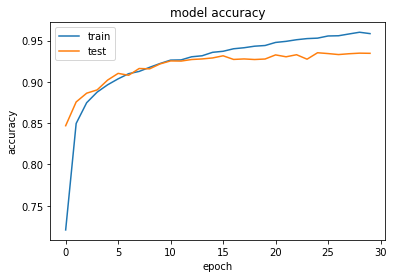

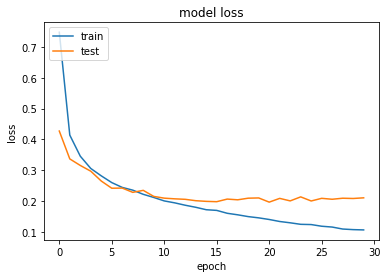

Epoch 1/30
120/120 [==============================] - 8s 60ms/step - loss: 0.8361 - accuracy: 0.6860 - val_loss: 0.4855 - val_accuracy: 0.8191
Epoch 2/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4814 - accuracy: 0.8197 - val_loss: 0.3779 - val_accuracy: 0.8594
Epoch 3/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4055 - accuracy: 0.8498 - val_loss: 0.3391 - val_accuracy: 0.8764
Epoch 4/30
120/120 [==============================] - 7s 57ms/step - loss: 0.3611 - accuracy: 0.8659 - val_loss: 0.2931 - val_accuracy: 0.8927
Epoch 5/30
120/120 [==============================] - 7s 57ms/step - loss: 0.3354 - accuracy: 0.8758 - val_loss: 0.2904 - val_accuracy: 0.8905
Epoch 6/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3137 - accuracy: 0.8845 - val_loss: 0.2691 - val_accuracy: 0.8990
Epoch 7/30
120/120 [==============================] - 7s 58ms/step - loss: 0.2964 - accuracy: 0.8908 - val_loss: 0.2539 - val_accuracy: 0.9052

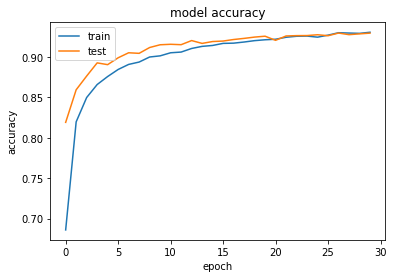

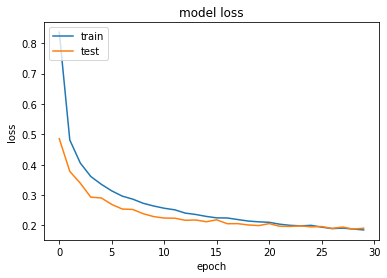

Epoch 1/30
120/120 [==============================] - 8s 61ms/step - loss: 1.0910 - accuracy: 0.5819 - val_loss: 0.5907 - val_accuracy: 0.7686
Epoch 2/30
120/120 [==============================] - 7s 57ms/step - loss: 0.6299 - accuracy: 0.7595 - val_loss: 0.5054 - val_accuracy: 0.8094
Epoch 3/30
120/120 [==============================] - 7s 57ms/step - loss: 0.5463 - accuracy: 0.7910 - val_loss: 0.4315 - val_accuracy: 0.8407
Epoch 4/30
120/120 [==============================] - 7s 59ms/step - loss: 0.4975 - accuracy: 0.8112 - val_loss: 0.3893 - val_accuracy: 0.8551
Epoch 5/30
120/120 [==============================] - 7s 57ms/step - loss: 0.4627 - accuracy: 0.8271 - val_loss: 0.3718 - val_accuracy: 0.8617
Epoch 6/30
120/120 [==============================] - 7s 59ms/step - loss: 0.4300 - accuracy: 0.8392 - val_loss: 0.3399 - val_accuracy: 0.8730
Epoch 7/30
120/120 [==============================] - 7s 59ms/step - loss: 0.4094 - accuracy: 0.8480 - val_loss: 0.3272 - val_accuracy: 0.8804

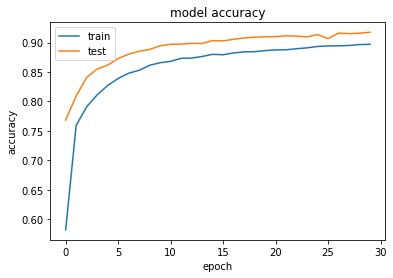

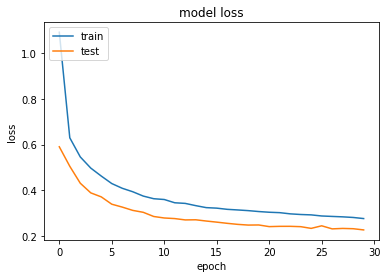

In [27]:
dr = [0.3,0.5,0.7]
train_acc = []
test_acc = []
for i in dr:
  model = Sequential()
  model.add(Conv2D(32, (3,3),padding="same",activation="relu", input_shape=(28,28,1)))
  model.add(Conv2D(32, (3,3), activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(i))
  model.add(Conv2D(64, (3,3), padding="same",activation="relu"))
  model.add(Conv2D(64,(3,3), activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(i))

  model.add(Flatten()) # connecting conv2d to dense 

  model.add(Dense(512,activation="relu"))
  model.add(Dropout(i))
  model.add(Dense(256,activation="relu"))
  model.add(Dense(10,activation="softmax"))

  # Compile the model 
  model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])


  #model.summary()

  train = model.fit(X_train,y_train,batch_size=500,epochs=30,validation_data=(X_test,y_test),shuffle=True)
  train_loss,train_accuracy = model.evaluate(X_train,y_train)
  val_loss,val_accuracy = model.evaluate(X_test,y_test)
  train_acc.append(train_accuracy)
  test_acc.append(val_accuracy)
  plt.plot(train.history['accuracy'])
  plt.plot(train.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(train.history['loss'])
  plt.plot(train.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


Changing Optimizer

Epoch 1/10
120/120 [==============================] - 8s 59ms/step - loss: 2.2988 - accuracy: 0.1243 - val_loss: 2.2884 - val_accuracy: 0.3089
Epoch 2/10
120/120 [==============================] - 7s 60ms/step - loss: 2.2718 - accuracy: 0.1643 - val_loss: 2.2291 - val_accuracy: 0.3437
Epoch 3/10
120/120 [==============================] - 7s 57ms/step - loss: 2.0778 - accuracy: 0.2470 - val_loss: 1.5540 - val_accuracy: 0.5049
Epoch 4/10
120/120 [==============================] - 7s 60ms/step - loss: 1.5550 - accuracy: 0.4100 - val_loss: 1.1446 - val_accuracy: 0.5703
Epoch 5/10
120/120 [==============================] - 7s 60ms/step - loss: 1.2807 - accuracy: 0.5050 - val_loss: 1.0427 - val_accuracy: 0.5857
Epoch 6/10
120/120 [==============================] - 7s 57ms/step - loss: 1.1494 - accuracy: 0.5561 - val_loss: 0.9748 - val_accuracy: 0.6176
Epoch 7/10
120/120 [==============================] - 7s 60ms/step - loss: 1.0547 - accuracy: 0.5954 - val_loss: 0.9042 - val_accuracy: 0.6496

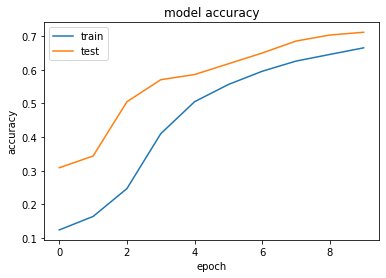

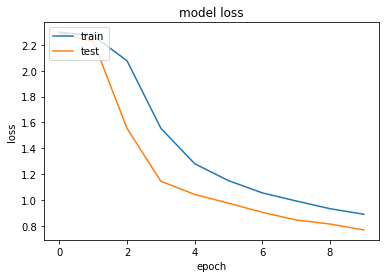

Epoch 1/10
120/120 [==============================] - 8s 63ms/step - loss: 2.3049 - accuracy: 0.1044 - val_loss: 2.3006 - val_accuracy: 0.1004
Epoch 2/10
120/120 [==============================] - 7s 61ms/step - loss: 2.3033 - accuracy: 0.1050 - val_loss: 2.2991 - val_accuracy: 0.1010
Epoch 3/10
120/120 [==============================] - 7s 58ms/step - loss: 2.3016 - accuracy: 0.1067 - val_loss: 2.2978 - val_accuracy: 0.1054
Epoch 4/10
120/120 [==============================] - 7s 58ms/step - loss: 2.3002 - accuracy: 0.1085 - val_loss: 2.2964 - val_accuracy: 0.1184
Epoch 5/10
120/120 [==============================] - 7s 60ms/step - loss: 2.2989 - accuracy: 0.1102 - val_loss: 2.2950 - val_accuracy: 0.1411
Epoch 6/10
120/120 [==============================] - 7s 58ms/step - loss: 2.2971 - accuracy: 0.1159 - val_loss: 2.2936 - val_accuracy: 0.1613
Epoch 7/10
120/120 [==============================] - 7s 61ms/step - loss: 2.2954 - accuracy: 0.1151 - val_loss: 2.2922 - val_accuracy: 0.1783

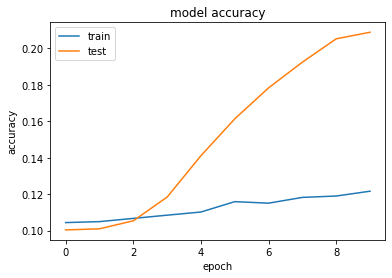

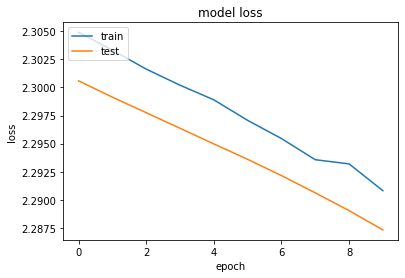

Epoch 1/10
120/120 [==============================] - 9s 65ms/step - loss: 0.8853 - accuracy: 0.6711 - val_loss: 0.5536 - val_accuracy: 0.7878
Epoch 2/10
120/120 [==============================] - 7s 62ms/step - loss: 0.5065 - accuracy: 0.8107 - val_loss: 0.4301 - val_accuracy: 0.8377
Epoch 3/10
120/120 [==============================] - 7s 62ms/step - loss: 0.4165 - accuracy: 0.8441 - val_loss: 0.3781 - val_accuracy: 0.8559
Epoch 4/10
120/120 [==============================] - 7s 62ms/step - loss: 0.3701 - accuracy: 0.8639 - val_loss: 0.3297 - val_accuracy: 0.8745
Epoch 5/10
120/120 [==============================] - 8s 63ms/step - loss: 0.3378 - accuracy: 0.8745 - val_loss: 0.2956 - val_accuracy: 0.8890
Epoch 6/10
120/120 [==============================] - 7s 62ms/step - loss: 0.3178 - accuracy: 0.8845 - val_loss: 0.2716 - val_accuracy: 0.9016
Epoch 7/10
120/120 [==============================] - 7s 62ms/step - loss: 0.2945 - accuracy: 0.8898 - val_loss: 0.2841 - val_accuracy: 0.8932

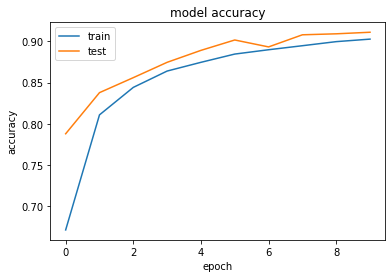

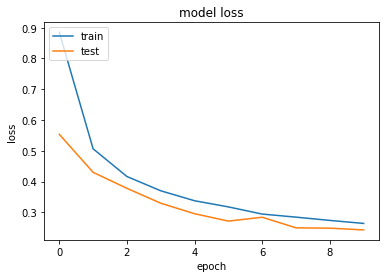

In [28]:
op = ['SGD','Adadelta','RMSprop']
train_op_acc = []
test_op_acc = []
for i in op:
  model = Sequential()
  model.add(Conv2D(32, (3,3),padding="same",activation="relu", input_shape=(28,28,1)))
  model.add(Conv2D(32, (3,3), activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(64, (3,3), padding="same",activation="relu"))
  model.add(Conv2D(64,(3,3), activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten()) # connecting conv2d to dense 

  model.add(Dense(512,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(256,activation="relu"))
  model.add(Dense(10,activation="softmax"))

  # Compile the model 
  model.compile(optimizer=i,loss="categorical_crossentropy",metrics=['accuracy'])


  #model.summary()

  train = model.fit(X_train,y_train,batch_size=500,epochs=10,validation_data=(X_test,y_test),shuffle=True)
  train_loss,train_accuracy = model.evaluate(X_train,y_train)
  val_loss,val_accuracy = model.evaluate(X_test,y_test)
  train_op_acc.append(train_accuracy)
  test_op_acc.append(val_accuracy)

  plt.plot(train.history['accuracy'])
  plt.plot(train.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(train.history['loss'])
  plt.plot(train.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()



Changing Activation Function

Epoch 1/10
120/120 [==============================] - 8s 61ms/step - loss: 0.7097 - accuracy: 0.7483 - val_loss: 0.4890 - val_accuracy: 0.8280
Epoch 2/10
120/120 [==============================] - 7s 58ms/step - loss: 0.4602 - accuracy: 0.8332 - val_loss: 0.4183 - val_accuracy: 0.8594
Epoch 3/10
120/120 [==============================] - 7s 58ms/step - loss: 0.4110 - accuracy: 0.8506 - val_loss: 0.3478 - val_accuracy: 0.8772
Epoch 4/10
120/120 [==============================] - 7s 61ms/step - loss: 0.3809 - accuracy: 0.8612 - val_loss: 0.3328 - val_accuracy: 0.8774
Epoch 5/10
120/120 [==============================] - 7s 59ms/step - loss: 0.3567 - accuracy: 0.8695 - val_loss: 0.3105 - val_accuracy: 0.8910
Epoch 6/10
120/120 [==============================] - 7s 61ms/step - loss: 0.3397 - accuracy: 0.8748 - val_loss: 0.3038 - val_accuracy: 0.8857
Epoch 7/10
120/120 [==============================] - 7s 61ms/step - loss: 0.3247 - accuracy: 0.8807 - val_loss: 0.2981 - val_accuracy: 0.8927

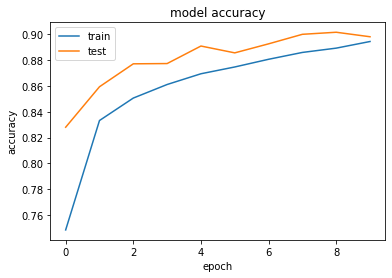

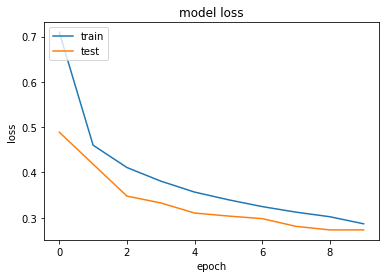

Epoch 1/10
120/120 [==============================] - 8s 61ms/step - loss: 0.6664 - accuracy: 0.7573 - val_loss: 0.4403 - val_accuracy: 0.8409
Epoch 2/10
120/120 [==============================] - 7s 59ms/step - loss: 0.4424 - accuracy: 0.8394 - val_loss: 0.3826 - val_accuracy: 0.8616
Epoch 3/10
120/120 [==============================] - 7s 61ms/step - loss: 0.3891 - accuracy: 0.8573 - val_loss: 0.3391 - val_accuracy: 0.8792
Epoch 4/10
120/120 [==============================] - 7s 59ms/step - loss: 0.3607 - accuracy: 0.8674 - val_loss: 0.3222 - val_accuracy: 0.8826
Epoch 5/10
120/120 [==============================] - 7s 61ms/step - loss: 0.3417 - accuracy: 0.8750 - val_loss: 0.3151 - val_accuracy: 0.8848
Epoch 6/10
120/120 [==============================] - 7s 59ms/step - loss: 0.3280 - accuracy: 0.8793 - val_loss: 0.2876 - val_accuracy: 0.8938
Epoch 7/10
120/120 [==============================] - 7s 61ms/step - loss: 0.3110 - accuracy: 0.8845 - val_loss: 0.2990 - val_accuracy: 0.8890

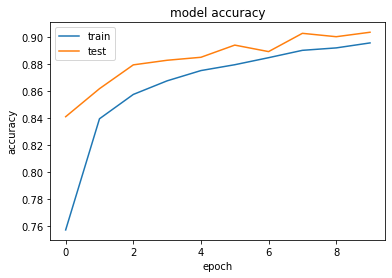

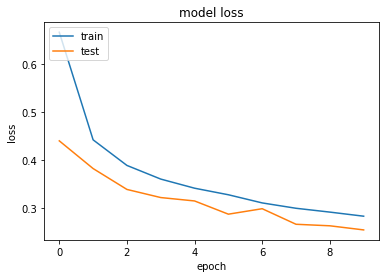

Epoch 1/10
120/120 [==============================] - 8s 60ms/step - loss: 0.6770 - accuracy: 0.7507 - val_loss: 0.4531 - val_accuracy: 0.8373
Epoch 2/10
120/120 [==============================] - 7s 60ms/step - loss: 0.4426 - accuracy: 0.8392 - val_loss: 0.3884 - val_accuracy: 0.8655
Epoch 3/10
120/120 [==============================] - 7s 60ms/step - loss: 0.3925 - accuracy: 0.8568 - val_loss: 0.3533 - val_accuracy: 0.8696
Epoch 4/10
120/120 [==============================] - 7s 58ms/step - loss: 0.3571 - accuracy: 0.8689 - val_loss: 0.3281 - val_accuracy: 0.8799
Epoch 5/10
120/120 [==============================] - 7s 61ms/step - loss: 0.3361 - accuracy: 0.8759 - val_loss: 0.3031 - val_accuracy: 0.8877
Epoch 6/10
120/120 [==============================] - 7s 58ms/step - loss: 0.3200 - accuracy: 0.8819 - val_loss: 0.2812 - val_accuracy: 0.8963
Epoch 7/10
120/120 [==============================] - 7s 61ms/step - loss: 0.3085 - accuracy: 0.8874 - val_loss: 0.2986 - val_accuracy: 0.8932

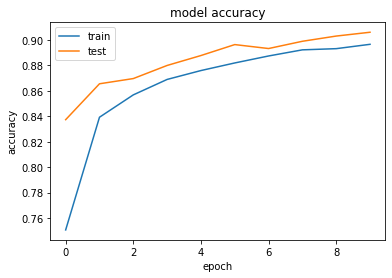

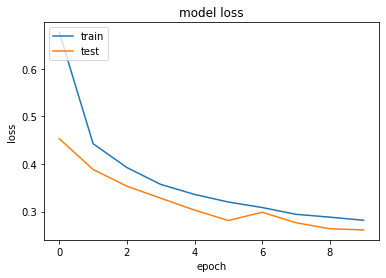

In [29]:
fn = ['selu','elu','tanh']
train_op_acc = []
test_op_acc = []
for i in fn:
  model = Sequential()
  model.add(Conv2D(32, (3,3),padding="same",activation=i, input_shape=(28,28,1)))
  model.add(Conv2D(32, (3,3), activation=i))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(64, (3,3), padding="same",activation=i))
  model.add(Conv2D(64,(3,3), activation=i))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten()) # connecting conv2d to dense 

  model.add(Dense(512,activation=i))
  model.add(Dropout(0.5))
  model.add(Dense(256,activation=i))
  model.add(Dense(10,activation="softmax"))

  # Compile the model 
  model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


  #model.summary()

  train = model.fit(X_train,y_train,batch_size=500,epochs=10,validation_data=(X_test,y_test),shuffle=True)
  train_loss,train_accuracy = model.evaluate(X_train,y_train)
  val_loss,val_accuracy = model.evaluate(X_test,y_test)
  train_op_acc.append(train_accuracy)
  test_op_acc.append(val_accuracy)

  plt.plot(train.history['accuracy'])
  plt.plot(train.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(train.history['loss'])
  plt.plot(train.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()



Changing Kernel Initalizer

Epoch 1/10
120/120 [==============================] - 8s 63ms/step - loss: 0.8434 - accuracy: 0.6823 - val_loss: 0.5034 - val_accuracy: 0.8136
Epoch 2/10
120/120 [==============================] - 7s 58ms/step - loss: 0.4929 - accuracy: 0.8151 - val_loss: 0.3872 - val_accuracy: 0.8591
Epoch 3/10
120/120 [==============================] - 7s 60ms/step - loss: 0.4104 - accuracy: 0.8495 - val_loss: 0.3279 - val_accuracy: 0.8788
Epoch 4/10
120/120 [==============================] - 7s 58ms/step - loss: 0.3618 - accuracy: 0.8658 - val_loss: 0.2992 - val_accuracy: 0.8886
Epoch 5/10
120/120 [==============================] - 7s 60ms/step - loss: 0.3321 - accuracy: 0.8787 - val_loss: 0.2757 - val_accuracy: 0.8961
Epoch 6/10
120/120 [==============================] - 7s 61ms/step - loss: 0.3101 - accuracy: 0.8860 - val_loss: 0.2733 - val_accuracy: 0.8967
Epoch 7/10
120/120 [==============================] - 7s 58ms/step - loss: 0.2946 - accuracy: 0.8907 - val_loss: 0.2520 - val_accuracy: 0.9075

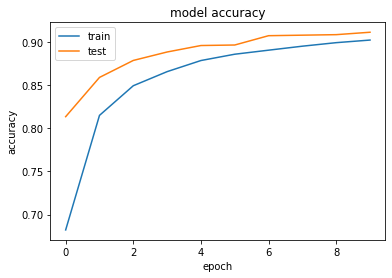

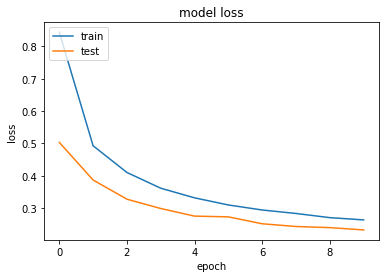

Epoch 1/10
120/120 [==============================] - 8s 61ms/step - loss: 0.8708 - accuracy: 0.6683 - val_loss: 0.5108 - val_accuracy: 0.8054
Epoch 2/10
120/120 [==============================] - 7s 58ms/step - loss: 0.4977 - accuracy: 0.8130 - val_loss: 0.3963 - val_accuracy: 0.8549
Epoch 3/10
120/120 [==============================] - 7s 61ms/step - loss: 0.4169 - accuracy: 0.8460 - val_loss: 0.3553 - val_accuracy: 0.8643
Epoch 4/10
120/120 [==============================] - 7s 60ms/step - loss: 0.3729 - accuracy: 0.8609 - val_loss: 0.3053 - val_accuracy: 0.8859
Epoch 5/10
120/120 [==============================] - 7s 58ms/step - loss: 0.3401 - accuracy: 0.8737 - val_loss: 0.2857 - val_accuracy: 0.8936
Epoch 6/10
120/120 [==============================] - 7s 58ms/step - loss: 0.3180 - accuracy: 0.8827 - val_loss: 0.2798 - val_accuracy: 0.8969
Epoch 7/10
120/120 [==============================] - 7s 58ms/step - loss: 0.3036 - accuracy: 0.8886 - val_loss: 0.2598 - val_accuracy: 0.9042

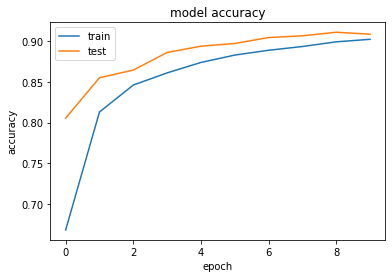

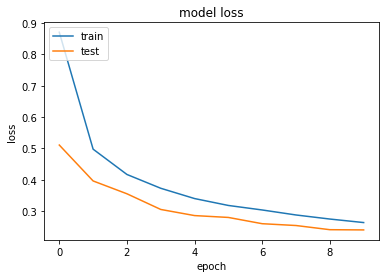

Epoch 1/10
120/120 [==============================] - 8s 61ms/step - loss: 0.8356 - accuracy: 0.6823 - val_loss: 0.4916 - val_accuracy: 0.8194
Epoch 2/10
120/120 [==============================] - 7s 61ms/step - loss: 0.4856 - accuracy: 0.8195 - val_loss: 0.3999 - val_accuracy: 0.8513
Epoch 3/10
120/120 [==============================] - 7s 58ms/step - loss: 0.4082 - accuracy: 0.8489 - val_loss: 0.3418 - val_accuracy: 0.8696
Epoch 4/10
120/120 [==============================] - 7s 61ms/step - loss: 0.3627 - accuracy: 0.8668 - val_loss: 0.3050 - val_accuracy: 0.8882
Epoch 5/10
120/120 [==============================] - 7s 58ms/step - loss: 0.3323 - accuracy: 0.8773 - val_loss: 0.2860 - val_accuracy: 0.8953
Epoch 6/10
120/120 [==============================] - 7s 58ms/step - loss: 0.3163 - accuracy: 0.8843 - val_loss: 0.2654 - val_accuracy: 0.9013
Epoch 7/10
120/120 [==============================] - 7s 59ms/step - loss: 0.2967 - accuracy: 0.8902 - val_loss: 0.2522 - val_accuracy: 0.9078

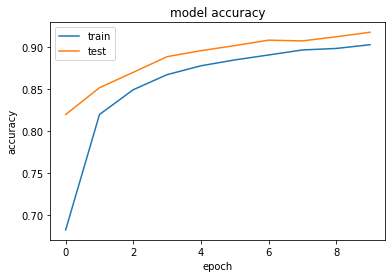

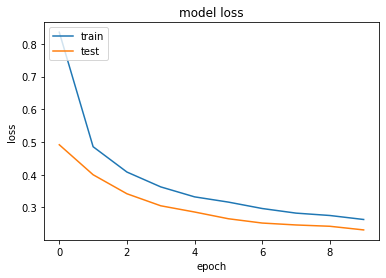

In [30]:
ki = ['random_normal','random_uniform','truncated_normal']
train_op_acc = []
test_op_acc = []
for i in ki:
  model = Sequential()
  model.add(Conv2D(32, (3,3),padding="same",activation="relu", input_shape=(28,28,1)))
  model.add(Conv2D(32, (3,3), activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(64, (3,3), padding="same",activation="relu"))
  model.add(Conv2D(64,(3,3), activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten()) # connecting conv2d to dense 

  model.add(Dense(512,activation="relu",kernel_initializer=i))
  model.add(Dropout(0.5))
  model.add(Dense(256,activation="relu",kernel_initializer=i))
  model.add(Dense(10,activation="softmax"))

  # Compile the model 
  model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


  #model.summary()

  train = model.fit(X_train,y_train,batch_size=500,epochs=10,validation_data=(X_test,y_test),shuffle=True)
  train_loss,train_accuracy = model.evaluate(X_train,y_train)
  val_loss,val_accuracy = model.evaluate(X_test,y_test)
  train_op_acc.append(train_accuracy)
  test_op_acc.append(val_accuracy)

  plt.plot(train.history['accuracy'])
  plt.plot(train.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(train.history['loss'])
  plt.plot(train.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()



Changing Kernel Size

Epoch 1/10
120/120 [==============================] - 9s 58ms/step - loss: 0.8558 - accuracy: 0.6749 - val_loss: 0.4961 - val_accuracy: 0.8115
Epoch 2/10
120/120 [==============================] - 7s 56ms/step - loss: 0.4907 - accuracy: 0.8148 - val_loss: 0.3869 - val_accuracy: 0.8624
Epoch 3/10
120/120 [==============================] - 7s 59ms/step - loss: 0.4008 - accuracy: 0.8526 - val_loss: 0.3252 - val_accuracy: 0.8802
Epoch 4/10
120/120 [==============================] - 7s 56ms/step - loss: 0.3516 - accuracy: 0.8702 - val_loss: 0.2974 - val_accuracy: 0.8893
Epoch 5/10
120/120 [==============================] - 7s 58ms/step - loss: 0.3233 - accuracy: 0.8797 - val_loss: 0.2870 - val_accuracy: 0.8939
Epoch 6/10
120/120 [==============================] - 7s 55ms/step - loss: 0.3065 - accuracy: 0.8872 - val_loss: 0.2733 - val_accuracy: 0.8980
Epoch 7/10
120/120 [==============================] - 7s 56ms/step - loss: 0.2859 - accuracy: 0.8934 - val_loss: 0.2545 - val_accuracy: 0.9085

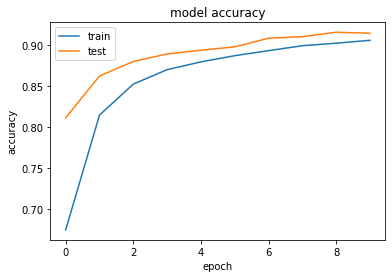

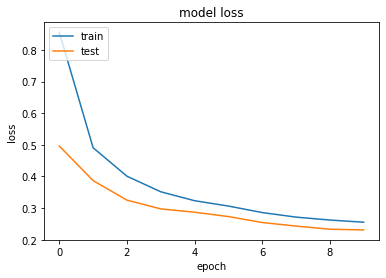

Epoch 1/10
120/120 [==============================] - 12s 88ms/step - loss: 0.9054 - accuracy: 0.6493 - val_loss: 0.5279 - val_accuracy: 0.8004
Epoch 2/10
120/120 [==============================] - 10s 86ms/step - loss: 0.5028 - accuracy: 0.8104 - val_loss: 0.4108 - val_accuracy: 0.8476
Epoch 3/10
120/120 [==============================] - 10s 86ms/step - loss: 0.4110 - accuracy: 0.8484 - val_loss: 0.3382 - val_accuracy: 0.8717
Epoch 4/10
120/120 [==============================] - 10s 86ms/step - loss: 0.3642 - accuracy: 0.8693 - val_loss: 0.3157 - val_accuracy: 0.8834
Epoch 5/10
120/120 [==============================] - 10s 86ms/step - loss: 0.3316 - accuracy: 0.8796 - val_loss: 0.3092 - val_accuracy: 0.8877
Epoch 6/10
120/120 [==============================] - 10s 86ms/step - loss: 0.3128 - accuracy: 0.8846 - val_loss: 0.2885 - val_accuracy: 0.8947
Epoch 7/10
120/120 [==============================] - 10s 84ms/step - loss: 0.2961 - accuracy: 0.8906 - val_loss: 0.2779 - val_accuracy:

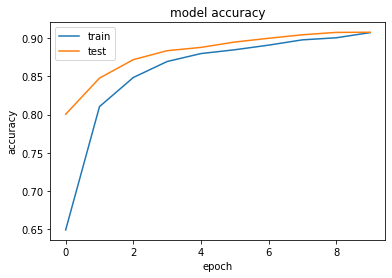

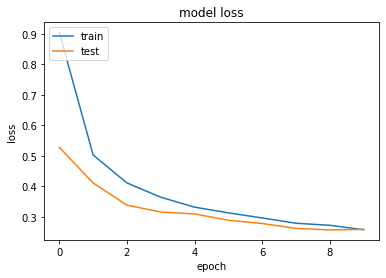

Epoch 1/10
120/120 [==============================] - 12s 86ms/step - loss: 1.0867 - accuracy: 0.5771 - val_loss: 0.5982 - val_accuracy: 0.7681
Epoch 2/10
120/120 [==============================] - 10s 84ms/step - loss: 0.6047 - accuracy: 0.7683 - val_loss: 0.4826 - val_accuracy: 0.8124
Epoch 3/10
120/120 [==============================] - 10s 82ms/step - loss: 0.5080 - accuracy: 0.8109 - val_loss: 0.3964 - val_accuracy: 0.8570
Epoch 4/10
120/120 [==============================] - 10s 84ms/step - loss: 0.4408 - accuracy: 0.8403 - val_loss: 0.3614 - val_accuracy: 0.8714
Epoch 5/10
120/120 [==============================] - 10s 82ms/step - loss: 0.4042 - accuracy: 0.8541 - val_loss: 0.3384 - val_accuracy: 0.8806
Epoch 6/10
120/120 [==============================] - 10s 84ms/step - loss: 0.3714 - accuracy: 0.8675 - val_loss: 0.3302 - val_accuracy: 0.8808
Epoch 7/10
120/120 [==============================] - 10s 82ms/step - loss: 0.3528 - accuracy: 0.8729 - val_loss: 0.3409 - val_accuracy:

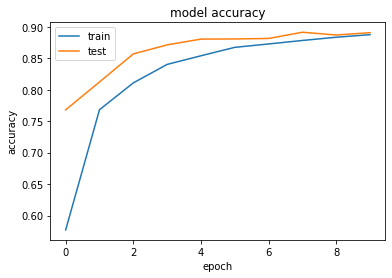

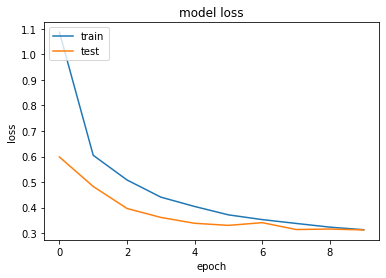

In [31]:
ks = [5,7,9]
train_op_acc = []
test_op_acc = []
for i in ks:
  model = Sequential()
  model.add(Conv2D(32, i,padding="same",activation="relu", input_shape=(28,28,1)))
  model.add(Conv2D(32, i, activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(64, i, padding="same",activation="relu"))
  model.add(Conv2D(64,i, activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten()) # connecting conv2d to dense 

  model.add(Dense(512,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(256,activation="relu"))
  model.add(Dense(10,activation="softmax"))

  # Compile the model 
  model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


  #model.summary()

  train = model.fit(X_train,y_train,batch_size=500,epochs=10,validation_data=(X_test,y_test),shuffle=True)
  train_loss,train_accuracy = model.evaluate(X_train,y_train)
  val_loss,val_accuracy = model.evaluate(X_test,y_test)
  train_op_acc.append(train_accuracy)
  test_op_acc.append(val_accuracy)

  plt.plot(train.history['accuracy'])
  plt.plot(train.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(train.history['loss'])
  plt.plot(train.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()



Changing Padding

Epoch 1/10
120/120 [==============================] - 7s 48ms/step - loss: 0.9116 - accuracy: 0.6531 - val_loss: 0.5396 - val_accuracy: 0.7883
Epoch 2/10
120/120 [==============================] - 6s 47ms/step - loss: 0.5408 - accuracy: 0.7923 - val_loss: 0.4276 - val_accuracy: 0.8400
Epoch 3/10
120/120 [==============================] - 6s 46ms/step - loss: 0.4560 - accuracy: 0.8305 - val_loss: 0.3610 - val_accuracy: 0.8687
Epoch 4/10
120/120 [==============================] - 6s 46ms/step - loss: 0.3988 - accuracy: 0.8535 - val_loss: 0.3205 - val_accuracy: 0.8852
Epoch 5/10
120/120 [==============================] - 6s 47ms/step - loss: 0.3715 - accuracy: 0.8627 - val_loss: 0.3059 - val_accuracy: 0.8887
Epoch 6/10
120/120 [==============================] - 6s 46ms/step - loss: 0.3447 - accuracy: 0.8736 - val_loss: 0.2860 - val_accuracy: 0.8969
Epoch 7/10
120/120 [==============================] - 6s 47ms/step - loss: 0.3260 - accuracy: 0.8811 - val_loss: 0.2800 - val_accuracy: 0.8985

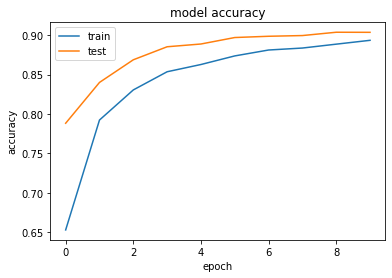

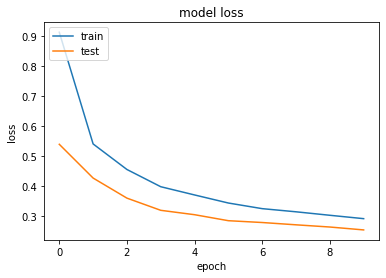

In [32]:
pd = ['valid']
train_op_acc = []
test_op_acc = []
for i in pd:
  model = Sequential()
  model.add(Conv2D(32, (3,3),padding=i,activation="relu", input_shape=(28,28,1)))
  model.add(Conv2D(32, (3,3), activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(64, (3,3), padding=i,activation="relu"))
  model.add(Conv2D(64,(3,3), activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten()) # connecting conv2d to dense 

  model.add(Dense(512,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(256,activation="relu"))
  model.add(Dense(10,activation="softmax"))

  # Compile the model 
  model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


  #model.summary()

  train = model.fit(X_train,y_train,batch_size=500,epochs=10,validation_data=(X_test,y_test),shuffle=True)
  train_loss,train_accuracy = model.evaluate(X_train,y_train)
  val_loss,val_accuracy = model.evaluate(X_test,y_test)
  train_op_acc.append(train_accuracy)
  test_op_acc.append(val_accuracy)

  plt.plot(train.history['accuracy'])
  plt.plot(train.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(train.history['loss'])
  plt.plot(train.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()



Early Stopping

Epoch 1/30
120/120 [==============================] - 8s 62ms/step - loss: 0.8234 - accuracy: 0.6884 - val_loss: 0.4793 - val_accuracy: 0.8206
Epoch 2/30
120/120 [==============================] - 7s 59ms/step - loss: 0.4749 - accuracy: 0.8227 - val_loss: 0.3758 - val_accuracy: 0.8610
Epoch 2: early stopping
313/313 [==============================] - 2s 6ms/step - loss: 0.3758 - accuracy: 0.8610


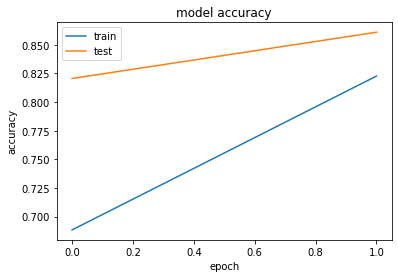

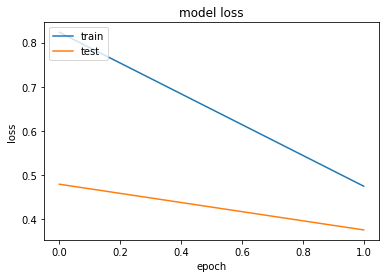

In [36]:
model = Sequential()
model.add(Conv2D(32, (3,3),padding="same",activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding="same",activation="relu"))
model.add(Conv2D(64,(3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten()) # connecting conv2d to dense 

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation="softmax"))

  # Compile the model 
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
#model.summary()

train = model.fit(X_train,y_train,batch_size=500,epochs=30,validation_data=(X_test,y_test),shuffle=True,callbacks=[es])
train_loss,train_accuracy = model.evaluate(X_train,y_train)
val_loss,val_accuracy = model.evaluate(X_test,y_test)
train_acc.append(train_accuracy)
test_acc.append(val_accuracy)
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


K-Fold

In [41]:
X_new = np.concatenate((X_train,X_test),axis=0)

In [42]:
X_new.shape

(70000, 28, 28)

In [43]:
y_new = np.concatenate((y_train,y_test),axis=0)

In [44]:
y_new.shape

(70000, 10)

In [45]:
kf = KFold(n_splits=10,shuffle=True,random_state=5)

Epoch 1/30
120/120 [==============================] - 9s 62ms/step - loss: 0.8526 - accuracy: 0.6735 - val_loss: 0.4995 - val_accuracy: 0.8175
Epoch 2/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4888 - accuracy: 0.8174 - val_loss: 0.4047 - val_accuracy: 0.8465
Epoch 3/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4150 - accuracy: 0.8458 - val_loss: 0.3326 - val_accuracy: 0.8787
Epoch 4/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3613 - accuracy: 0.8664 - val_loss: 0.3003 - val_accuracy: 0.8907
Epoch 5/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3326 - accuracy: 0.8760 - val_loss: 0.2849 - val_accuracy: 0.8960
Epoch 6/30
120/120 [==============================] - 7s 57ms/step - loss: 0.3109 - accuracy: 0.8849 - val_loss: 0.2694 - val_accuracy: 0.9016
Epoch 7/30
120/120 [==============================] - 7s 60ms/step - loss: 0.2992 - accuracy: 0.8904 - val_loss: 0.2594 - val_accuracy: 0.9063

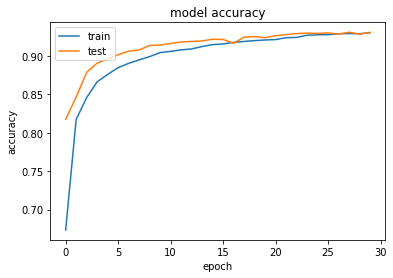

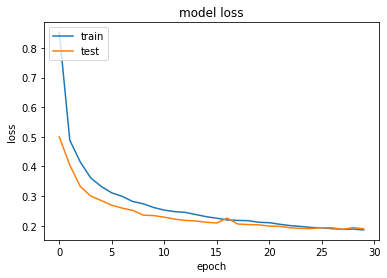

Epoch 1/30
120/120 [==============================] - 8s 60ms/step - loss: 0.8362 - accuracy: 0.6838 - val_loss: 0.5058 - val_accuracy: 0.8067
Epoch 2/30
120/120 [==============================] - 7s 58ms/step - loss: 0.4908 - accuracy: 0.8175 - val_loss: 0.3849 - val_accuracy: 0.8606
Epoch 3/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4099 - accuracy: 0.8472 - val_loss: 0.3329 - val_accuracy: 0.8749
Epoch 4/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3646 - accuracy: 0.8640 - val_loss: 0.3126 - val_accuracy: 0.8826
Epoch 5/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3347 - accuracy: 0.8750 - val_loss: 0.2800 - val_accuracy: 0.8956
Epoch 6/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3133 - accuracy: 0.8850 - val_loss: 0.2672 - val_accuracy: 0.9003
Epoch 7/30
120/120 [==============================] - 7s 58ms/step - loss: 0.2970 - accuracy: 0.8900 - val_loss: 0.2567 - val_accuracy: 0.9033

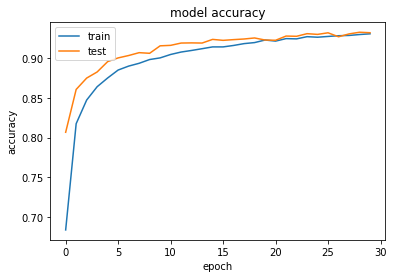

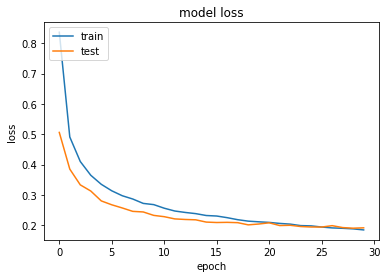

Epoch 1/30
120/120 [==============================] - 8s 60ms/step - loss: 0.8423 - accuracy: 0.6785 - val_loss: 0.5041 - val_accuracy: 0.8063
Epoch 2/30
120/120 [==============================] - 7s 58ms/step - loss: 0.4941 - accuracy: 0.8164 - val_loss: 0.3908 - val_accuracy: 0.8567
Epoch 3/30
120/120 [==============================] - 7s 58ms/step - loss: 0.4156 - accuracy: 0.8463 - val_loss: 0.3424 - val_accuracy: 0.8702
Epoch 4/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3717 - accuracy: 0.8620 - val_loss: 0.3201 - val_accuracy: 0.8776
Epoch 5/30
120/120 [==============================] - 7s 57ms/step - loss: 0.3378 - accuracy: 0.8734 - val_loss: 0.2870 - val_accuracy: 0.8920
Epoch 6/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3180 - accuracy: 0.8816 - val_loss: 0.2704 - val_accuracy: 0.9008
Epoch 7/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3002 - accuracy: 0.8893 - val_loss: 0.2641 - val_accuracy: 0.9021

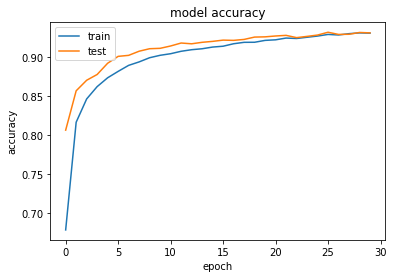

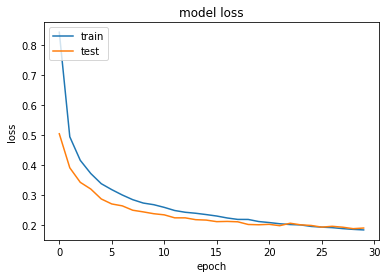

Epoch 1/30
120/120 [==============================] - 8s 60ms/step - loss: 0.8451 - accuracy: 0.6818 - val_loss: 0.4984 - val_accuracy: 0.8093
Epoch 2/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4746 - accuracy: 0.8223 - val_loss: 0.3811 - val_accuracy: 0.8547
Epoch 3/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4028 - accuracy: 0.8493 - val_loss: 0.3380 - val_accuracy: 0.8777
Epoch 4/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3563 - accuracy: 0.8689 - val_loss: 0.2931 - val_accuracy: 0.8932
Epoch 5/30
120/120 [==============================] - 7s 59ms/step - loss: 0.3264 - accuracy: 0.8796 - val_loss: 0.2776 - val_accuracy: 0.8950
Epoch 6/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3104 - accuracy: 0.8846 - val_loss: 0.2692 - val_accuracy: 0.8984
Epoch 7/30
120/120 [==============================] - 7s 60ms/step - loss: 0.2943 - accuracy: 0.8922 - val_loss: 0.2495 - val_accuracy: 0.9096

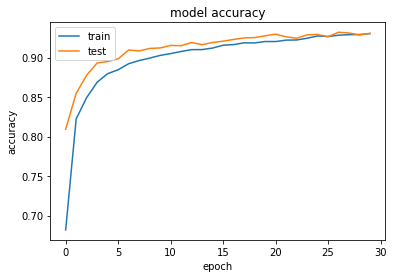

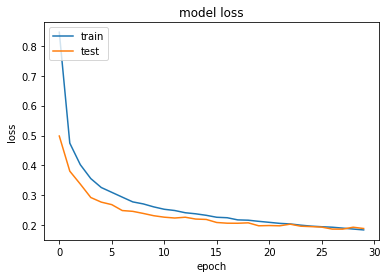

Epoch 1/30
120/120 [==============================] - 8s 63ms/step - loss: 0.8615 - accuracy: 0.6742 - val_loss: 0.4962 - val_accuracy: 0.8085
Epoch 2/30
120/120 [==============================] - 7s 58ms/step - loss: 0.4983 - accuracy: 0.8142 - val_loss: 0.4007 - val_accuracy: 0.8489
Epoch 3/30
120/120 [==============================] - 7s 57ms/step - loss: 0.4178 - accuracy: 0.8457 - val_loss: 0.3397 - val_accuracy: 0.8744
Epoch 4/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3727 - accuracy: 0.8624 - val_loss: 0.3148 - val_accuracy: 0.8845
Epoch 5/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3427 - accuracy: 0.8742 - val_loss: 0.2846 - val_accuracy: 0.8939
Epoch 6/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3187 - accuracy: 0.8821 - val_loss: 0.2733 - val_accuracy: 0.8985
Epoch 7/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3018 - accuracy: 0.8874 - val_loss: 0.2741 - val_accuracy: 0.9016

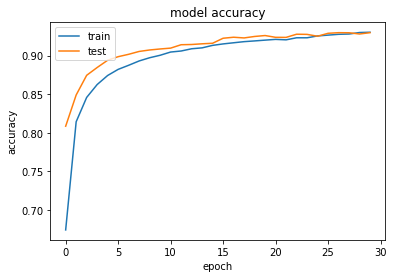

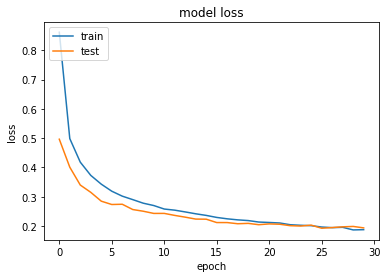

Epoch 1/30
120/120 [==============================] - 8s 60ms/step - loss: 0.8309 - accuracy: 0.6884 - val_loss: 0.5005 - val_accuracy: 0.8095
Epoch 2/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4852 - accuracy: 0.8192 - val_loss: 0.3832 - val_accuracy: 0.8577
Epoch 3/30
120/120 [==============================] - 7s 61ms/step - loss: 0.4025 - accuracy: 0.8512 - val_loss: 0.3449 - val_accuracy: 0.8727
Epoch 4/30
120/120 [==============================] - 7s 61ms/step - loss: 0.3640 - accuracy: 0.8658 - val_loss: 0.3068 - val_accuracy: 0.8842
Epoch 5/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3316 - accuracy: 0.8770 - val_loss: 0.2944 - val_accuracy: 0.8899
Epoch 6/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3144 - accuracy: 0.8849 - val_loss: 0.2698 - val_accuracy: 0.9022
Epoch 7/30
120/120 [==============================] - 7s 60ms/step - loss: 0.2971 - accuracy: 0.8901 - val_loss: 0.2569 - val_accuracy: 0.9035

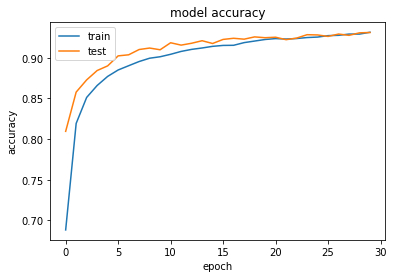

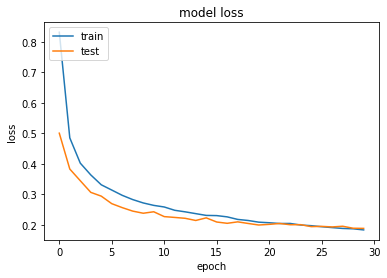

Epoch 1/30
120/120 [==============================] - 8s 60ms/step - loss: 0.8523 - accuracy: 0.6742 - val_loss: 0.4825 - val_accuracy: 0.8182
Epoch 2/30
120/120 [==============================] - 7s 59ms/step - loss: 0.4830 - accuracy: 0.8193 - val_loss: 0.3914 - val_accuracy: 0.8512
Epoch 3/30
120/120 [==============================] - 7s 57ms/step - loss: 0.4033 - accuracy: 0.8508 - val_loss: 0.3275 - val_accuracy: 0.8747
Epoch 4/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3580 - accuracy: 0.8687 - val_loss: 0.2972 - val_accuracy: 0.8892
Epoch 5/30
120/120 [==============================] - 7s 61ms/step - loss: 0.3276 - accuracy: 0.8796 - val_loss: 0.2857 - val_accuracy: 0.8919
Epoch 6/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3106 - accuracy: 0.8857 - val_loss: 0.2642 - val_accuracy: 0.9017
Epoch 7/30
120/120 [==============================] - 7s 60ms/step - loss: 0.2951 - accuracy: 0.8906 - val_loss: 0.2596 - val_accuracy: 0.9047

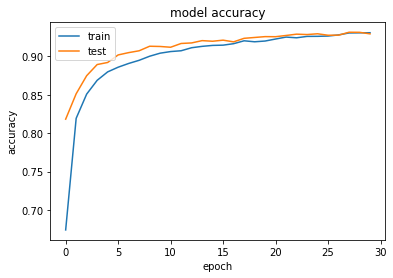

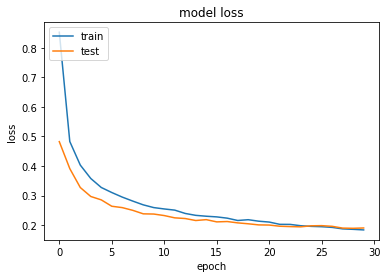

Epoch 1/30
120/120 [==============================] - 8s 63ms/step - loss: 0.8340 - accuracy: 0.6849 - val_loss: 0.4809 - val_accuracy: 0.8207
Epoch 2/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4875 - accuracy: 0.8187 - val_loss: 0.3935 - val_accuracy: 0.8548
Epoch 3/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4146 - accuracy: 0.8462 - val_loss: 0.3418 - val_accuracy: 0.8765
Epoch 4/30
120/120 [==============================] - 7s 57ms/step - loss: 0.3669 - accuracy: 0.8648 - val_loss: 0.3095 - val_accuracy: 0.8839
Epoch 5/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3406 - accuracy: 0.8747 - val_loss: 0.2941 - val_accuracy: 0.8930
Epoch 6/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3127 - accuracy: 0.8839 - val_loss: 0.2694 - val_accuracy: 0.9007
Epoch 7/30
120/120 [==============================] - 7s 58ms/step - loss: 0.2981 - accuracy: 0.8902 - val_loss: 0.2580 - val_accuracy: 0.9041

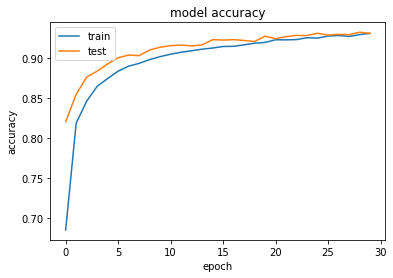

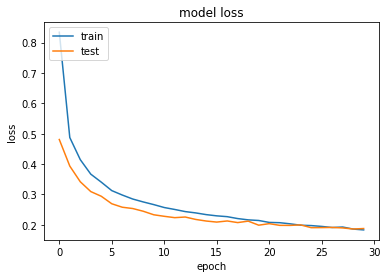

Epoch 1/30
120/120 [==============================] - 8s 63ms/step - loss: 0.8508 - accuracy: 0.6809 - val_loss: 0.4953 - val_accuracy: 0.8155
Epoch 2/30
120/120 [==============================] - 7s 58ms/step - loss: 0.4921 - accuracy: 0.8161 - val_loss: 0.3999 - val_accuracy: 0.8534
Epoch 3/30
120/120 [==============================] - 7s 58ms/step - loss: 0.4116 - accuracy: 0.8480 - val_loss: 0.3306 - val_accuracy: 0.8813
Epoch 4/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3616 - accuracy: 0.8657 - val_loss: 0.2957 - val_accuracy: 0.8916
Epoch 5/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3337 - accuracy: 0.8758 - val_loss: 0.2832 - val_accuracy: 0.8946
Epoch 6/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3106 - accuracy: 0.8846 - val_loss: 0.2709 - val_accuracy: 0.8947
Epoch 7/30
120/120 [==============================] - 7s 60ms/step - loss: 0.2951 - accuracy: 0.8912 - val_loss: 0.2643 - val_accuracy: 0.9017

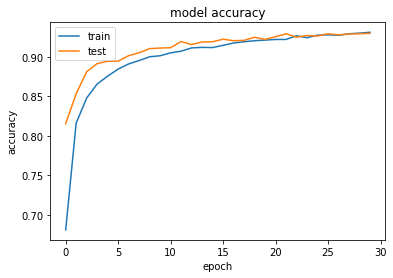

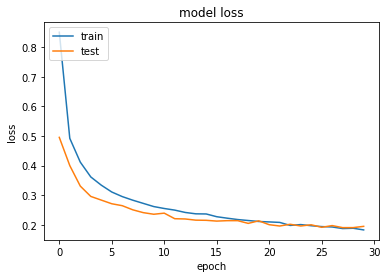

Epoch 1/30
120/120 [==============================] - 8s 60ms/step - loss: 0.8312 - accuracy: 0.6881 - val_loss: 0.4864 - val_accuracy: 0.8201
Epoch 2/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4875 - accuracy: 0.8176 - val_loss: 0.3863 - val_accuracy: 0.8567
Epoch 3/30
120/120 [==============================] - 7s 60ms/step - loss: 0.4104 - accuracy: 0.8494 - val_loss: 0.3411 - val_accuracy: 0.8758
Epoch 4/30
120/120 [==============================] - 7s 60ms/step - loss: 0.3600 - accuracy: 0.8669 - val_loss: 0.3037 - val_accuracy: 0.8898
Epoch 5/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3312 - accuracy: 0.8768 - val_loss: 0.2894 - val_accuracy: 0.8931
Epoch 6/30
120/120 [==============================] - 7s 58ms/step - loss: 0.3099 - accuracy: 0.8863 - val_loss: 0.2601 - val_accuracy: 0.9033
Epoch 7/30
120/120 [==============================] - 7s 58ms/step - loss: 0.2926 - accuracy: 0.8920 - val_loss: 0.2544 - val_accuracy: 0.9054

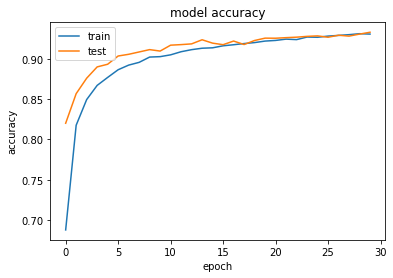

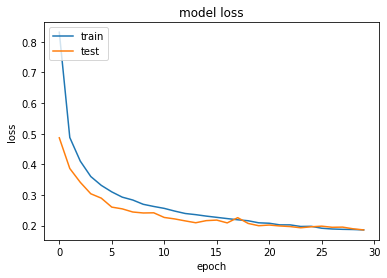

In [46]:
for train,test in kf.split(X_new,y_new):
  model = Sequential()
  model.add(Conv2D(32, (3,3),padding="same",activation="relu", input_shape=(28,28,1)))
  model.add(Conv2D(32, (3,3), activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(64, (3,3), padding="same",activation="relu"))
  model.add(Conv2D(64,(3,3), activation="relu"))

  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten()) # connecting conv2d to dense 

  model.add(Dense(512,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(256,activation="relu"))
  model.add(Dense(10,activation="softmax"))

  # Compile the model 
  model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
#model.summary()

  train = model.fit(X_train,y_train,batch_size=500,epochs=30,validation_data=(X_test,y_test),shuffle=True)
  train_loss,train_accuracy = model.evaluate(X_train,y_train)
  val_loss,val_accuracy = model.evaluate(X_test,y_test)
  train_acc.append(train_accuracy)
  test_acc.append(val_accuracy)
  plt.plot(train.history['accuracy'])
  plt.plot(train.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(train.history['loss'])
  plt.plot(train.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()



Batch Normalization

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_127 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_128 (Conv2D)         (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_95 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_129 (Conv2D)         (None, 13, 13, 64)      

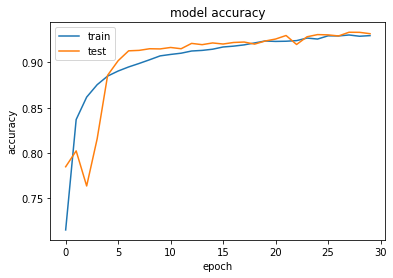

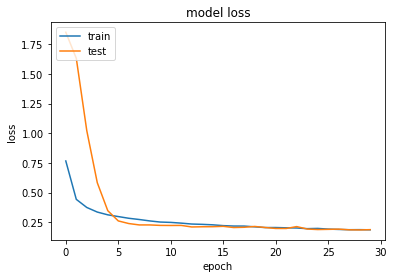

In [50]:

model = Sequential()
model.add(Conv2D(32, (3,3),padding="same",activation="relu", input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding="same",activation="relu"))
model.add(Conv2D(64,(3,3), activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten()) # connecting conv2d to dense 

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation="softmax"))

  # Compile the model 
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model.summary()

train = model.fit(X_train,y_train,batch_size=500,epochs=30,validation_data=(X_test,y_test),shuffle=True)
train_loss,train_accuracy = model.evaluate(X_train,y_train)
val_loss,val_accuracy = model.evaluate(X_test,y_test)
train_acc.append(train_accuracy)
test_acc.append(val_accuracy)
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

